# Scaled Dot-product Attention Mechanism

In the previous notebook, titled [Self-Attention Part 1](https://github.com/AnkitaMungalpara/Building-LLM-From-Scratch/blob/main/01_Self_Attention_In_Work_Part_1.ipynb), we implemented a simplified attention mechanism without any trainable weights.

In this notebook, we will take it a step further by implementing self-attention with trainable weights.

Let's see how it works!

## Computing the attention weights step by step


To compute the attention weights step by step, let's first introduce the concepts clearly, and then work through an example.

We have three trainable weight matrices: `Wq, Wk, and Wv`. These matrices are responsible for projecting the embedded input tokens into query, key, and value vectors, respectively.


In [1]:
import torch
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

In [6]:
inputs.shape

torch.Size([6, 3])

### Query, Key and Value Vectors

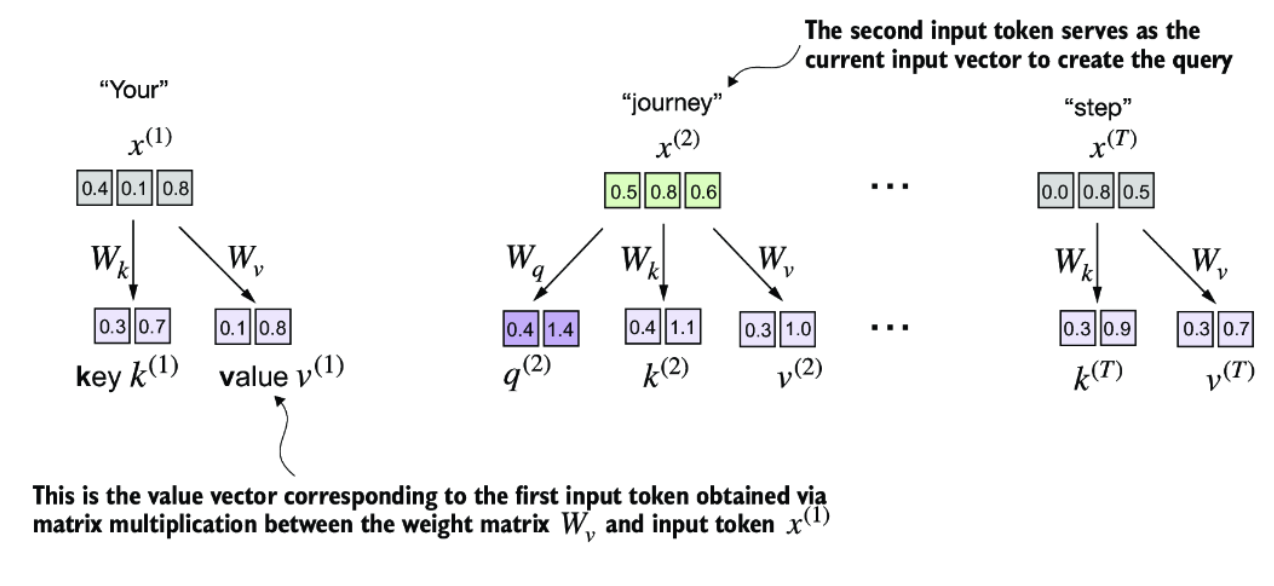

Credit:  [Build a Large Language Model (From Scratch)](https://www.manning.com/books/build-a-large-language-model-from-scratch)

Lets' define few variables:

In [2]:
x_2 = inputs[1]
d_in = inputs.shape[1]
d_out = 2

Now, we will initalize three weight matrices `Wq, Wk, and Wv`.

In [8]:
torch.manual_seed(42)
w_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
w_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
w_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

In [9]:
w_query.shape

torch.Size([3, 2])

Next, we compute query, key and value matrices for second input:


In [10]:
query_2 = x_2 @ w_query
key_2 = x_2 @ w_key
value_2 = x_2 @ w_value

In [11]:
query_2

tensor([1.0760, 1.7344])


Weight parameters in weight matrices are fundamental, learned coefficients that define the network connections, while attention weights are dynamic and context-specific values.

Next, we will obtain all the keys and values by performing matrix multiplication.

In [12]:
keys = inputs @ w_key
values = inputs @ w_value

In [14]:
keys.shape, values.shape

(torch.Size([6, 2]), torch.Size([6, 2]))

### Attention Score

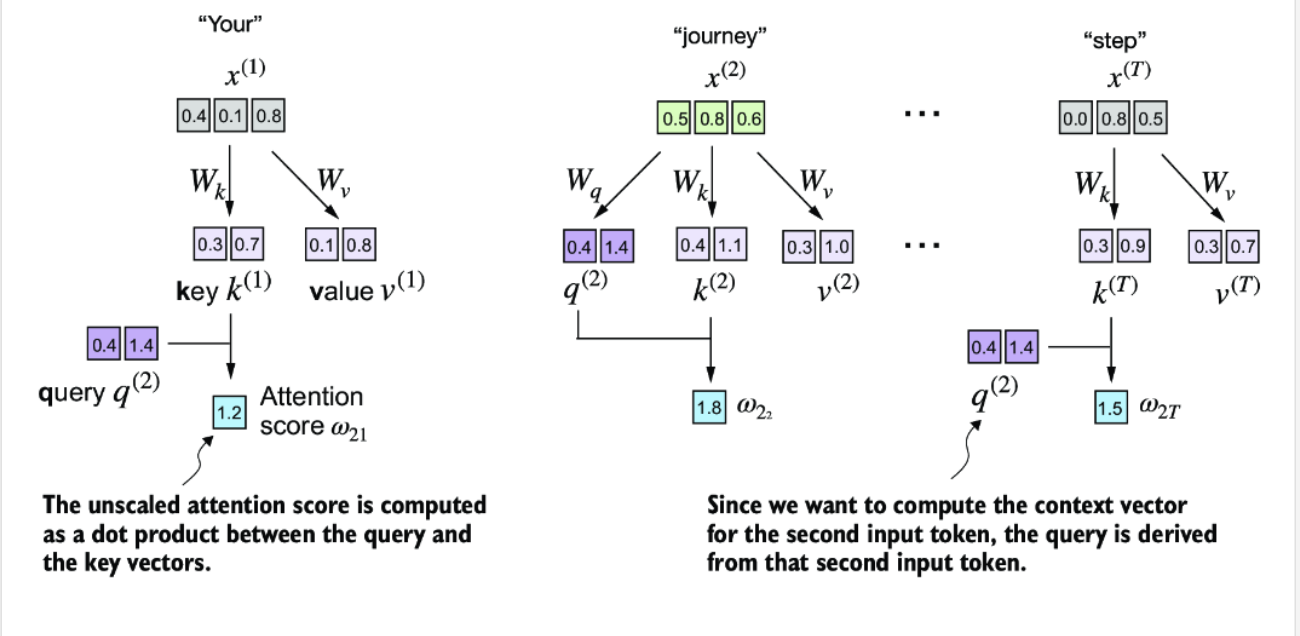

Credit:  [Build a Large Language Model (From Scratch)](https://www.manning.com/books/build-a-large-language-model-from-scratch)

Next, we compute attention score `w22`.

In [15]:
keys_2 = keys[1]
attention_score_22 = query_2.dot(key_2)

In [16]:
attention_score_22

tensor(3.3338)

Also, we can generalize this computation to all attention scores by doing matrix multiplication:

In [17]:
attention_score_2 = query_2 @ keys.T

In [18]:
attention_score_2

tensor([2.7084, 3.3338, 3.3013, 1.7563, 1.7869, 2.1966])

### Attention Weight

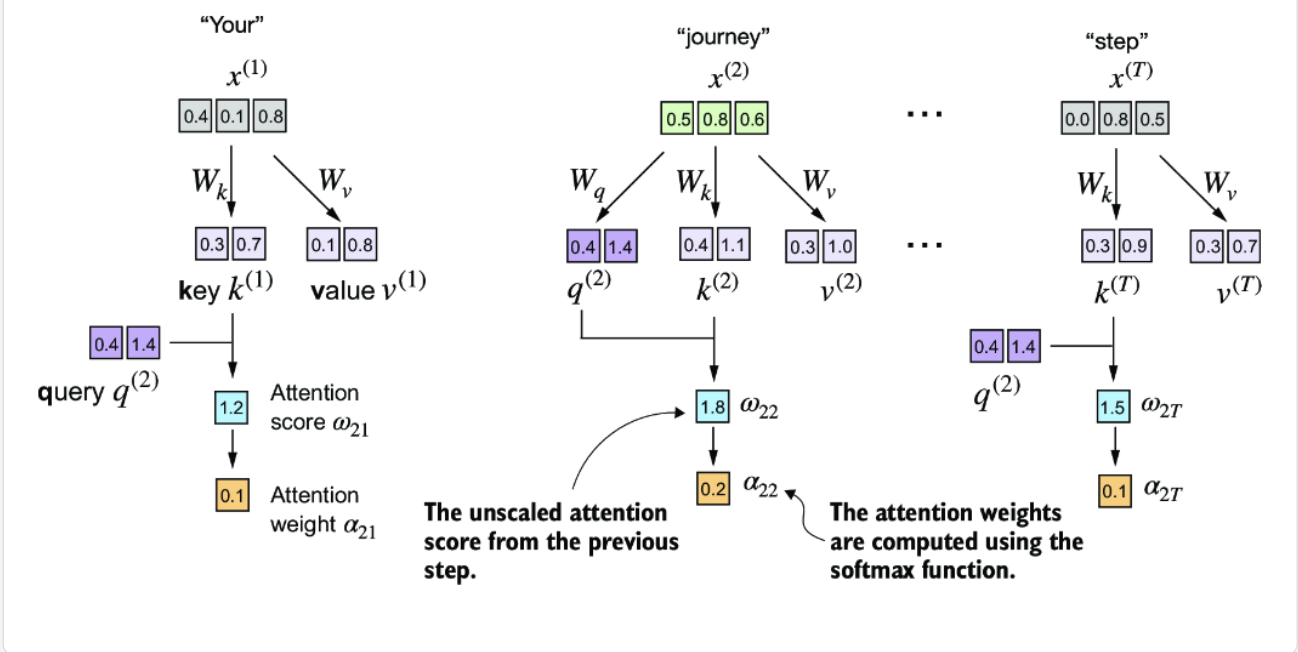

Credit:  [Build a Large Language Model (From Scratch)](https://www.manning.com/books/build-a-large-language-model-from-scratch)

Now, we compute **attention weights** by calling attention scores and using the softmax function. However, we scale the attention scores by dividing them by the square root of the embedding dimension of the keys.

In [19]:
keys.shape

torch.Size([6, 2])

In [21]:
d_k = keys.shape[-1]
attention_weights_2 = torch.softmax(attention_score_2 / d_k**0.5, dim=-1)

In [22]:
attention_weights_2

tensor([0.1723, 0.2681, 0.2620, 0.0879, 0.0898, 0.1200])

The scaling mechanism by the square root of the embedding dimension is the reason why self-attention is called the **scaled dot product** mechanism.

### Context Vector

Now it's time to compute context vectors. It is represented as a weighted sum over input vectors. We will compute the context vector as a weighted sum over the value vectors.

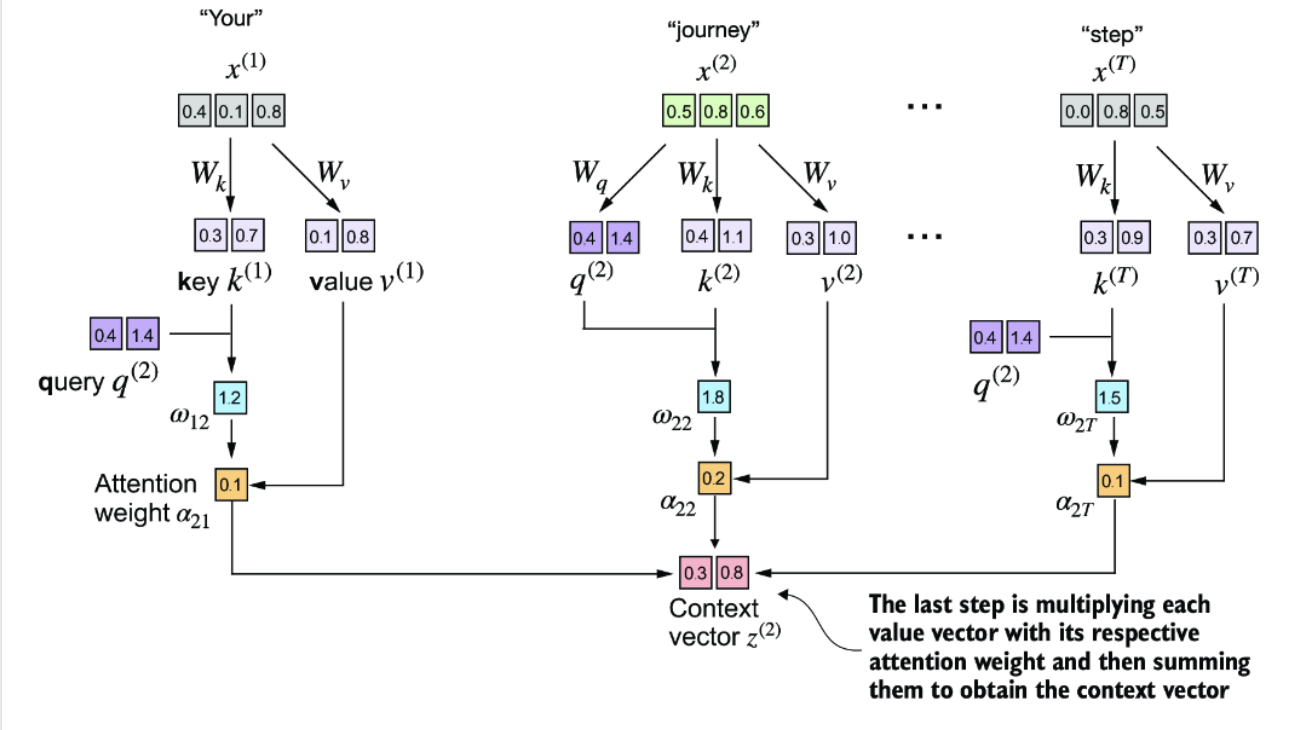

Credit:  [Build a Large Language Model (From Scratch)](https://www.manning.com/books/build-a-large-language-model-from-scratch)

In [25]:
context_vec_2 = attention_weights_2 @ values

In [26]:
context_vec_2

tensor([1.4201, 0.8892])


In this notebook, we explored the computations involved in self-attention using trainable weights. In the next notebook, we will organize this functionality into a Python class to make the code more modular and reusable.